In [1]:
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.static import teams 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from termcolor import colored

In [2]:
teams_info = teams.get_teams()

In [3]:
abbreviations = [x['abbreviation'] for x in teams_info]
print(abbreviations)

['ATL', 'BOS', 'CLE', 'NOP', 'CHI', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA']


In [4]:
league_game_log = leaguegamelog.LeagueGameLog(season = '2022', player_or_team_abbreviation = 'T').get_data_frames()[0]
league_game_log.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,240,45,...,37,48,31,11,4,18,23,123,14,1
1,22022,1610612747,LAL,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,240,40,...,39,48,23,12,4,22,18,109,-14,1
2,22022,1610612755,PHI,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,240,40,...,27,31,16,8,3,14,25,117,-9,1
3,22022,1610612738,BOS,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,240,46,...,30,36,24,8,3,11,23,126,9,1
4,22022,1610612743,DEN,Denver Nuggets,0022200012,2022-10-19,DEN @ UTA,L,240,40,...,25,35,21,10,3,21,23,102,-21,1


In [5]:
columns = list(league_game_log.columns)[8:-1]
print(columns)

['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS']


In [6]:
stat = input("Type the stat you want to visualize: ").upper()
while stat not in columns:
    print("Invalid stat.")
    stat = input("Type the stat you want to visualize: ")
    
n_last_games = 15

Type the stat you want to visualize: pts


In [7]:
def get_team_games(team, games):
    games_dict = dict()
    games_dict['GAMES'] = games[games['TEAM_ABBREVIATION'] == team]
    games_dict['GAMES_OPP'] = games[(games['MATCHUP'].str.contains(team)) & (games['TEAM_ABBREVIATION'] != team)]
    games_dict['GAMES_HOME'] = games_dict['GAMES'][~games_dict['GAMES']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_HOME_OPP'] = games_dict['GAMES_OPP'][games_dict['GAMES_OPP']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_AWAY'] = games_dict['GAMES'][games_dict['GAMES']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_AWAY_OPP'] = games_dict['GAMES_OPP'][~games_dict['GAMES_OPP']['MATCHUP'].str.contains('@')]
    return games_dict
    
def get_team_stat_means(team, games, stat, n_last_games):
    games = get_team_games(team, games)
    return team, games['GAMES'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_OPP'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_HOME'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_HOME_OPP'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_AWAY'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_AWAY_OPP'].iloc[-n_last_games:,:][stat].mean()
    
rows = []
for team in abbreviations:
    rows.append(get_team_stat_means(team, league_game_log, stat, n_last_games))
    
teams_stats = pd.DataFrame(rows, columns=['TEAM', 'MADE', 'CONCEDED', 'HOME_MADE', 'HOME_CONCEDED', 'AWAY_MADE', 'AWAY_CONCEDED'])
teams_stats

,TEAM,MADE,CONCEDED,HOME_MADE,HOME_CONCEDED,AWAY_MADE,AWAY_CONCEDED
0,ATL,117.166667,113.166667,111.333333,110.333333,123.000000,116.000000
1,BOS,116.666667,114.500000,120.333333,114.333333,113.000000,114.666667
2,CLE,117.666667,105.666667,113.666667,102.333333,121.666667,109.000000
3,NOP,118.500000,111.333333,117.000000,116.500000,119.250000,108.750000
4,CHI,112.714286,113.142857,112.250000,113.250000,113.333333,113.000000
5,DAL,117.833333,110.500000,120.666667,106.000000,115.000000,115.000000
6,DEN,114.142857,117.000000,116.333333,105.666667,112.500000,125.500000
7,GSW,118.714286,122.000000,124.750000,118.000000,110.666667,127.333333
8,HOU,109.857143,119.571429,118.000000,118.500000,106.600000,120.000000
9,LAC,100.666667,109.333333,93.000000,112.000000,104.500000,108.000000


In [8]:
def plot_stats_chart(team, games, opp_games, stat, teams_stats):
    dates = np.array(games['GAME_DATE'])
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    plt.plot(dates, made, c='blue', label ='Made')
    plt.plot(dates, conceded, c='red', label ='Conceded')
    
    for i in range(len(dates)):
        host = 'A' if '@' in games.iloc[i,:]['MATCHUP'] else 'H'
        plt.annotate("{}:{}".format(i+1, host), (dates[i], made[i] + 1), fontsize=8)
        
    title = "{} - {} Made-Conceded Progression".format(team, stat)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(stat)
    
    for xc in dates:
        plt.axvline(x=xc, color='black', linewidth=0.5)
        
    plt.xticks(fontsize=10, rotation=90)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.savefig(title + '.jpg', dpi=100)
    
    plt.show()

In [9]:
def plot_totals_with_line(team, games, opp_games, line, stat):
    dates = np.array(games['GAME_DATE'])
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    totals = made + conceded
    plt.plot(dates, totals, c='blue', label ='Totals')
    for i in range(len(dates)):
        host = 'A' if '@' in games.iloc[i,:]['MATCHUP'] else 'H'
        plt.annotate("{}:{}".format(i+1, host), (dates[i], totals[i] + 1), fontsize=8)
    
    title = "{} - {} Totals Progression".format(team, stat)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('{} Totals'.format(stat))
    
    plt.axhline(y=line, color='r', linestyle='-')
    for xc in dates:
        plt.axvline(x=xc, color='black', linewidth=0.5)
        
    plt.xticks(fontsize=10, rotation=90)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.savefig(title + '.jpg', dpi=100)
    
    plt.show()

In [10]:
def get_team_made_conceded_pct(games, opp_games, stat, line):
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    totals = made + conceded
    greater = (totals > line).sum()
    pct = greater*100/len(totals)
    return pct

def get_team_info(team, games, line, stat, n_last_games, is_home):
    overall_pct = get_team_made_conceded_pct(games['GAMES'].iloc[-n_last_games:,:], games['GAMES_OPP'].iloc[-n_last_games:,:], stat, line)
    print("\n{} had their totals above {} in {:.2f}% of the last {} games".format(team, line, overall_pct, n_last_games))
    if is_home:
        home_pct = get_team_made_conceded_pct(games['GAMES_HOME'].iloc[-n_last_games:,:], games['GAMES_HOME_OPP'].iloc[-n_last_games:,:], stat, line)
        print("At home, {} had their totals above {} in {:.2f}% of the last {} games".format(team, line, overall_pct, n_last_games))
    else:
        awat_pct = get_team_made_conceded_pct(games['GAMES_AWAY'].iloc[-n_last_games:,:], games['GAMES_AWAY_OPP'].iloc[-n_last_games:,:], stat, line)
        print("On the road, {} had their totals above {} in {:.2f}% of the last {} games".format(team, line, awat_pct, n_last_games))
        
def display_team_info(team, games, line, stat, n_last_games, is_home, teams_stats):
    games = get_team_games(team, games)
    last_games = games['GAMES'].iloc[-n_last_games:,:].reset_index(drop=True)
    last_games_opp = games['GAMES_OPP'].iloc[-n_last_games:,:]
    print('LAST {} GAMES:'.format(n_last_games))
    for i, row in last_games.iterrows():
        game_string = "{}: {} {} {} {} {} // Diff: {}".format(i+1, team, row['PTS'], '@' if '@' in row['MATCHUP'] else 'X', last_games_opp.iloc[i,:]['PTS'], last_games_opp.iloc[i,:]['TEAM_ABBREVIATION'], row['PTS']-last_games_opp.iloc[i,:]['PTS'])
        if row['WL'] == 'W':
            print(colored(game_string, 'green'))
        else:
            print(colored(game_string, 'red'))
    
    get_team_info(team, games, line, stat, n_last_games, is_home)
    plot_stats_chart(team, games['GAMES'].iloc[-n_last_games:,:], games['GAMES_OPP'].iloc[-n_last_games:,:], stat, teams_stats)
    plot_totals_with_line(team, games['GAMES'].iloc[-n_last_games:,:], games['GAMES_OPP'].iloc[-n_last_games:,:], line, stat)


In [15]:
def team_input(input_string):
    team = input(input_string).upper()
    while team not in abbreviations:
        print("Invalid team.")
        team = input(input_string)
    return team

team_a = team_input("Type the abbreviation of the home team: ")
team_b = team_input("Type the abbreviation of the away team: ")

Type the abbreviation of the home team: mil
Type the abbreviation of the away team: det


In [16]:
while True:
    line = input("Type the line that represents the spread: ")
    try:
        line = float(line)
        break
    except ValueError:
        pass
    print("Invalid value.")

Type the line that represents the spread: 224.5


LAST 15 GAMES:
1: MIL 90 @ 88 PHI // Diff: 2
2: MIL 125 X 105 HOU // Diff: 20
3: MIL 110 X 99 BKN // Diff: 11
4: MIL 119 X 108 NYK // Diff: 11
5: MIL 123 X 115 ATL // Diff: 8

MIL had their totals above 224.5 in 60.00% of the last 15 games
At home, MIL had their totals above 224.5 in 60.00% of the last 15 games


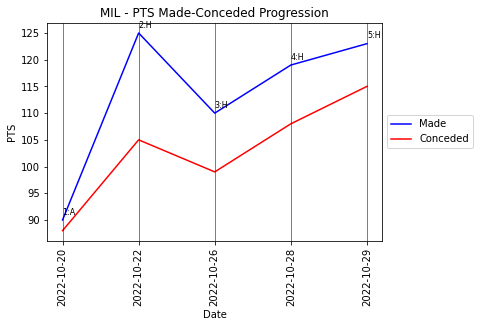

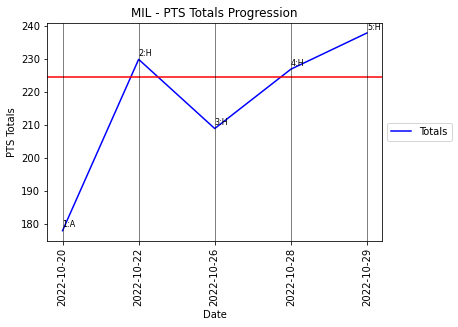

In [17]:
display_team_info(team_a, league_game_log, line, stat, n_last_games, True, teams_stats)

LAST 15 GAMES:
1: DET 113 X 109 ORL // Diff: 4
2: DET 106 @ 130 NYK // Diff: -24
3: DET 115 @ 124 IND // Diff: -9
4: DET 99 @ 120 WAS // Diff: -21
5: DET 113 X 118 ATL // Diff: -5
6: DET 112 X 136 ATL // Diff: -24
7: DET 128 X 114 GSW // Diff: 14

DET had their totals above 224.5 in 71.43% of the last 15 games
On the road, DET had their totals above 224.5 in 66.67% of the last 15 games


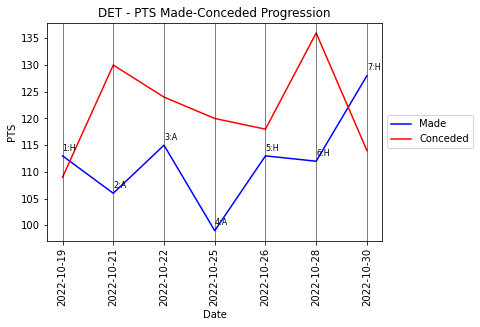

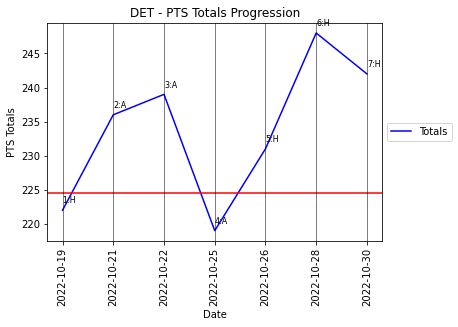

In [18]:
display_team_info(team_b, league_game_log, line, stat, n_last_games, False, teams_stats)